In [29]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import re
import requests
import seaborn as sns

In [30]:
pd.set_option('max_colwidth', 400)

In [31]:
import os
current_path = os.path.abspath(os.getcwd())
plots_directory = os.path.join(current_path, 'plots')

if not os.path.exists(plots_directory):
    os.makedirs(plots_directory)

### Import data

In [32]:
df = pd.read_csv('datasets/1_clean_data.csv')

In [33]:
df.columns

Index(['Unnamed: 0', 'publication_date', 'publication_month',
       'publication_day', 'author', 'title', 'url', 'koronawirus_in_text',
       'koronawirus_in_title', 'question_mark', 'exclamation_mark',
       'all_words', 'koronawirus_anywhere', 'koronawirus_anywhere_count'],
      dtype='object')

In [34]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head(2)

,publication_date,publication_month,publication_day,author,title,url,koronawirus_in_text,koronawirus_in_title,question_mark,exclamation_mark,all_words,koronawirus_anywhere,koronawirus_anywhere_count
0,2020-08-30 14:52:00,2020-08,2020-08-30,kaja,Salmonella w kurczakach! Główny Inspektorat Sanitarny ostrzega,https://lublin.se.pl/salmonella-w-kurczakach-glowny-inspektorat-sanitarny-ostrzega-ak-zuvx-nuNm-w7xC.html,2,0,1,0,263,2,1
1,2020-08-28 20:45:00,2020-08,2020-08-28,mariusz mucha,Kiełbasiany ZŁODZIEJ wpadł w Lublinie. Rzucił się Z TULIPANEM na ochroniarza!,https://lublin.se.pl/kielbasiany-zlodziej-wpadl-w-lublinie-aa-Phpp-QAn1-bHnw.html,0,0,0,0,243,0,0


# Project

### First articles with covid in the title

In [35]:
covid_articles = df.sort_values(by=['koronawirus_in_title', 'publication_date'], ascending=[False, True])
covid_articles[['publication_date', 'author', 'title', 'url']].head(8)

,publication_date,author,title,url
902,2020-01-29 15:07:00,mpgt,"Koronawirus na Lubelszczyźnie? Sześć osób trafiło na badania! [AKTUALIZACJA, AUDIO]",https://www.se.pl/lublin/koronawirus-na-lubelszczyznie-lecieli-samolotem-z-pasazerami-z-chin-trafili-na-badania-aa-u6Ye-EK9f-HCQa.html
1588,2020-01-31 10:46:00,marek targoński,Koronawirus z Chin: Gdzie jest? Sprawdź swój region! Lubelskie jest bezpieczne? [MAPA],https://www.se.pl/lublin/koronawirus-z-chin-gdzie-jest-sprawdz-swoj-region-lubelskie-jest-bezpieczne-mapa-aa-GhkG-KYdd-SAR3.html
883,2020-02-05 16:54:00,ac,Koronawirus w Lublinie? Mężczyzna zgłosił się z do kliniki chorób zakaźnych! [AKTUALIZACJA],https://www.se.pl/lublin/koronawirus-w-lublinie-mezczyzna-zglosil-sie-z-objawami-do-kliniki-chorob-zakaznych-aa-QMCk-3SQs-eVz3.html
1576,2020-02-08 22:25:00,marek targoński,KORONAWIRUS w Lublinie? Znamy wyniki badań! NOWE INFORMACJE [RELACJA],https://www.se.pl/lublin/koronawirus-w-lublinie-pacjent-trafil-do-szpitala-trwaja-badania-audio-aa-mgQE-Sn8h-sSd3.html
1551,2020-02-26 09:33:00,marek targoński,Koronawirus w Lubelskiem? Wrócili z Włoch – 27 osób pod lupą sanepidu. „Zwiększone ryzyko” [AKTUALIZACJA],https://www.se.pl/lublin/koronawirus-w-lubelskiem-wrocili-z-wloch-27-osob-pod-lupa-sanepidu-zwiekszone-ryzyko-aa-9VGu-q7k3-Bj45.html
837,2020-02-26 13:31:00,marek targoński,Koronawirus w Lublinie? Uczelnia zawiesza rekrutację cudzoziemców. „Wszyscy się boimy”,https://www.se.pl/lublin/koronawirus-w-lublinie-uczelnia-zawiesza-rekrutacje-cudzoziemcow-wszyscy-sie-boimy-aa-CKyb-X5br-fqRb.html
1549,2020-02-26 14:58:00,marek targoński,"Koronawirus w Lubelskiem? Dwie osoby w szpitalu! Trwają badania [AKTUALIZACJA, AUDIO]",https://www.se.pl/lublin/koronawirus-na-lubelszczyznie-dwie-osoby-w-szpitalu-trwaja-badania-aa-aWVz-FSnY-zPri.html
835,2020-02-27 07:42:00,marek targoński,Koronawirus. Gdzie zgłosić się z objawami w Lublinie? Oddziały zakaźne w Lubelskiem [ADRESY],https://www.se.pl/lublin/koronawirus-gdzie-zglosic-sie-z-objawami-w-lublinie-oddzialy-zakazne-w-lubelskiem-adresy-aa-HEUE-KYLF-y22f.html


### Number of articles with covid in the title

In [36]:
df.koronawirus_in_title.sum()

367

### Mean number of covid articles in the title

In [37]:
df.koronawirus_in_title.mean()

0.22228952150211992

### Number of articles with covid in the title each month

<Figure size 432x288 with 0 Axes>

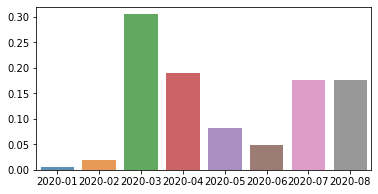

In [39]:
fig = plt.figure()

df_with_koronawirus_in_title = df.where(df["koronawirus_in_title"] > 0).dropna()
publication_month_with_koronawirus_in_title_count = df_with_koronawirus_in_title.publication_month.astype('category').value_counts(normalize=True)
plt.figure(figsize=(6, 3))
sns_plot = sns.barplot(publication_month_with_koronawirus_in_title_count.index, publication_month_with_koronawirus_in_title_count.values, alpha=0.8)
plt.show()
fig = sns_plot.get_figure()
fig.savefig("plots/graphics.png")

In [32]:
df_with_koronawirus_in_title.groupby('publication_month').count()

,publication_date,publication_day,author,title,url,koronawirus_in_text,koronawirus_in_title,question_mark,exclamation_mark,all_words,koronawirus_anywhere,koronawirus_anywhere_count
publication_month,,,,,,,,,,,,
2020-01,2,2,2,2,2,2,2,2,2,2,2,2
2020-02,7,7,7,7,7,7,7,7,7,7,7,7
2020-03,111,111,111,111,111,111,111,111,111,111,111,111
2020-04,69,69,69,69,69,69,69,69,69,69,69,69
2020-05,30,30,30,30,30,30,30,30,30,30,30,30
2020-06,18,18,18,18,18,18,18,18,18,18,18,18
2020-07,64,64,64,64,64,64,64,64,64,64,64,64
2020-08,64,64,64,64,64,64,64,64,64,64,64,64


<Figure size 432x288 with 0 Axes>

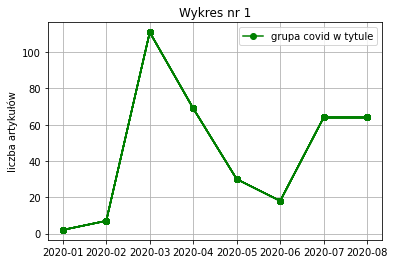

In [40]:
fig = plt.figure()
plt.figure(figsize=(6, 4))
df_with_koronawirus_in_title = df.where(df["koronawirus_in_title"] > 0).dropna()
# plt.style.use('ggplot')
# plt.style.use('dark_background')
#plt.style.use('seaborn-whitegrid')
plt.plot(df_with_koronawirus_in_title.groupby('publication_month').count(),
         color='g',
        marker='o')
plt.ylabel("liczba artykułów")
plt.legend(["grupa covid w tytule"])
plt.title("Wykres nr 1")
# plt.annotate(["2", (0, 8)], ["7", (1.2, 2)])
plt.grid()
plt.show()
fig.savefig('plots/line_graph_1.png')

### Number of articles with covid in the text

In [41]:
koronawirus_in_text_true = df['koronawirus_in_text'] > 0
df['koronawirus_in_text'][koronawirus_in_text_true].count()

607

In [42]:
koronawirus_in_text_true.mean()

0.3676559660811629

### Number of covid articles in the text each month

In [43]:
df_with_koronawirus_in_text = df.where(df["koronawirus_in_text"] > 0).dropna()
df_with_koronawirus_in_text.head(3)

,publication_date,publication_month,publication_day,author,title,url,koronawirus_in_text,koronawirus_in_title,question_mark,exclamation_mark,all_words,koronawirus_anywhere,koronawirus_anywhere_count
0,2020-08-30 14:52:00,2020-08,2020-08-30,kaja,Salmonella w kurczakach! Główny Inspektorat Sanitarny ostrzega,https://lublin.se.pl/salmonella-w-kurczakach-glowny-inspektorat-sanitarny-ostrzega-ak-zuvx-nuNm-w7xC.html,2.0,0.0,1.0,0.0,263.0,2.0,1.0
8,2020-08-28 13:01:00,2020-08,2020-08-28,marek targoński,"Biała Podlaska: Znęcała się nad synową?! Groziła, że ją ZABIJE i SPALI jej rzeczy",https://lublin.se.pl/biala-podlaska-znecala-sie-nad-synowa-grozila-ze-ja-zabije-i-spali-jej-rzeczy-aa-kGD6-t84r-yBdM.html,3.0,0.0,2.0,0.0,202.0,3.0,1.0
10,2020-08-28 12:15:00,2020-08,2020-08-28,marek targoński,Lubelskie: Prawie 30 nowych zakażeń koronawirusem. Ponad 400 aktywnych przypadków COVID,https://lublin.se.pl/lubelskie-prawie-30-nowych-zakazen-koronawirusem-ponad-400-aktywnych-przypadkow-covid-aa-QU5z-ZQFk-LAAg.html,19.0,1.0,1.0,0.0,150.0,20.0,1.0


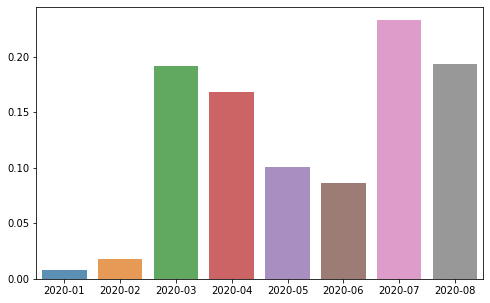

In [44]:
publication_month_with_koronawirus_in_text_count = df_with_koronawirus_in_text.publication_month.astype('category').value_counts(normalize=True)
plt.figure(figsize=(8, 5))
sns.barplot(publication_month_with_koronawirus_in_text_count.index, publication_month_with_koronawirus_in_text_count.values, alpha=0.8)
plt.show()

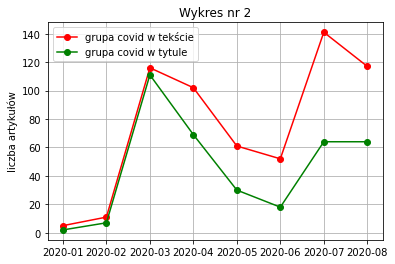

In [45]:
fig = plt.figure()
plt.plot(df_with_koronawirus_in_text[['koronawirus_in_text', 'publication_month']].groupby('publication_month').count(),
        color='r',
        marker='o')

plt.plot(df_with_koronawirus_in_title[['koronawirus_in_title', 'publication_month']].groupby('publication_month').count(),
        color='g',
        marker='o')

plt.ylabel("liczba artykułów")
plt.grid()
plt.legend(["grupa covid w tekście", "grupa covid w tytule"])
plt.title("Wykres nr 2")
plt.show()
fig.savefig('plots/line_graph_2.png')

In [46]:
df_with_koronawirus_in_text.groupby('publication_month').count()

,publication_date,publication_day,author,title,url,koronawirus_in_text,koronawirus_in_title,question_mark,exclamation_mark,all_words,koronawirus_anywhere,koronawirus_anywhere_count
publication_month,,,,,,,,,,,,
2020-01,5,5,5,5,5,5,5,5,5,5,5,5
2020-02,11,11,11,11,11,11,11,11,11,11,11,11
2020-03,116,116,116,116,116,116,116,116,116,116,116,116
2020-04,102,102,102,102,102,102,102,102,102,102,102,102
2020-05,61,61,61,61,61,61,61,61,61,61,61,61
2020-06,52,52,52,52,52,52,52,52,52,52,52,52
2020-07,141,141,141,141,141,141,141,141,141,141,141,141
2020-08,117,117,117,117,117,117,117,117,117,117,117,117


### Articles from July with covid in the title / without covid in the text

In [47]:
title_false = df['koronawirus_in_title'] == 0
text_true = df['koronawirus_in_text'] > 0
publication_month_07 = df['publication_month'] == "2020-07"

df_title_false_and_text_true = df[title_false & text_true & publication_month_07]

df_title_false_and_text_true.sort_values(by='koronawirus_in_text', ascending=False)[:50]

,publication_date,publication_month,publication_day,author,title,url,koronawirus_in_text,koronawirus_in_title,question_mark,exclamation_mark,all_words,koronawirus_anywhere,koronawirus_anywhere_count
339,2020-07-10 10:01:00,2020-07,2020-07-10,maal,Fundacja Poczty Polskiej pomaga nie tylko pocztowcom,https://lublin.se.pl/fundacja-poczty-polskiej-pomaga-nie-tylko-pocztowcom-ak-mhyB-eDys-5KSt.html,13,0,0,0,421,13,1
198,2020-07-28 17:28:00,2020-07,2020-07-28,karolina januszek,Zakaz handlu tymczasowo zniesiony? Jest projekt,https://lublin.se.pl/zakaz-handlu-tymczasowo-zniesiony-jest-projekt-ak-UDmc-xk46-WKyr.html,12,0,1,0,319,12,1
1224,2020-07-09 18:24:00,2020-07,2020-07-09,maal,Obowiązkowe mierzenie temperatury pracownikom w Polsce! Ministerstwo reaguje,https://lublin.se.pl/obowiazkowe-mierzenie-temperatury-pracownikom-w-polsce-ministerstwo-reaguje-ak-NVmS-RHLu-NcPj.html,11,0,0,1,180,11,1
434,2020-07-01 07:42:00,2020-07,2020-07-01,bartłomiej ważny,"Startuje Słoneczny Wrotków nad Zalewem Zemborzyckim. Sprawdź, co się zmieniło!",https://lublin.se.pl/startuje-sloneczny-wrotkow-nad-zalewem-zemborzyckim-sprawdz-co-sie-zmienilo-ak-fyZF-StCT-ebme.html,11,0,1,3,801,11,1
228,2020-07-24 17:07:00,2020-07,2020-07-24,kaja,Żabka przekazała 3 mln złotych polskim szpitalom. Wszystko dzięki klientom sieci,https://lublin.se.pl/zabka-przekazala-3-mln-zlotych-polskim-szpitalom-wszystko-dzieki-klientom-sieci-ak-EUZA-ARLQ-7Z7i.html,10,0,0,5,440,10,1
247,2020-07-22 15:39:00,2020-07,2020-07-22,karolina januszek,Zmiany w zakazie handlu. Jest nowy pomysł,https://lublin.se.pl/zmiany-w-zakazie-handlu-jest-nowy-pomysl-ak-2SVz-XDkR-RuTM.html,6,0,0,0,240,6,1
270,2020-07-20 13:30:00,2020-07,2020-07-20,karolina januszek,Koniec pracy zdalnej. Jak przygotować firmę na powrót pracowników?,https://lublin.se.pl/koniec-pracy-zdalnej-jak-przygotowac-firme-na-powrot-pracownikow-ak-ftj7-XGSi-pprp.html,5,0,0,0,475,5,1
405,2020-07-03 14:20:00,2020-07,2020-07-03,karolina januszek,Primark w Polsce. Co dalej z otwarciem sklepu w Warszawie?,https://lublin.se.pl/primark-w-polsce-co-dalej-z-otwarciem-sklepu-w-warszawie-ak-7vbs-ADkt-xaho.html,5,0,0,0,228,5,1
252,2020-07-22 12:13:00,2020-07,2020-07-22,karolina januszek,Minister Finansów o deficycie. Padła gigantyczna kwota,https://lublin.se.pl/minister-finansow-o-deficycie-padla-gigantyczna-kwota-ak-BwaP-W8ob-8aQ8.html,5,0,1,2,295,5,1
1266,2020-07-03 15:34:00,2020-07,2020-07-03,om,Studenci z Lublina zaprojektowali wyjątkowy bolid i wygrali konkurs dla konstruktorów [WIDEO],https://lublin.se.pl/studenci-z-lublina-zaprojektowali-wyjatkowy-bolid-i-wygrali-konkurs-dla-konstruktorow-wideo-ak-f9K4-QhLX-YQbu.html,4,0,0,0,363,4,1


In [48]:
title_false = df['koronawirus_in_title'] == 0
text_true = df['koronawirus_in_text'] > 0
publication_month_07 = df['publication_month'] == "2020-08"

df_title_false_and_text_true = df[title_false & text_true & publication_month_07]

df_title_false_and_text_true.sort_values(by='koronawirus_in_text', ascending=False)[:50]

,publication_date,publication_month,publication_day,author,title,url,koronawirus_in_text,koronawirus_in_title,question_mark,exclamation_mark,all_words,koronawirus_anywhere,koronawirus_anywhere_count
998,2020-08-28 08:27:00,2020-08,2020-08-28,marek targoński,Biała Podlaska nie jest już „żółtą strefą”. NOWE OGRANICZENIA omijają Lubelskie,https://lublin.se.pl/biala-podlaska-nie-jest-juz-zolta-strefa-nowe-ograniczenia-omijaja-lubelskie-aa-jGr9-ey1N-ZqS5.html,13,0,4,0,191,13,1
83,2020-08-19 16:06:00,2020-08,2020-08-19,karolina januszek,Koniec zakazu handlu? Większość Polaków chce zmian,https://lublin.se.pl/koniec-zakazu-handlu-stanowcza-deklaracja-polakow-ak-JMnw-vRFC-xaa6.html,10,0,0,1,316,10,1
74,2020-08-20 12:06:00,2020-08,2020-08-20,karolina januszek,"Rada Ministrów przyjęła projekt budżetu. Deficyt na poziomie 109,3 mld złotych",https://lublin.se.pl/rada-ministrow-przyjela-projekt-budzetu-deficyt-na-poziomie-109-3-mld-zlotych-ak-DTiM-L4G5-jT7S.html,6,0,0,0,296,6,1
44,2020-08-25 15:11:00,2020-08,2020-08-25,karolina januszek,Dochód podstawowy. W tym kraju każdy dostanie pensję?,https://lublin.se.pl/dochod-podstawowy-w-tym-kraju-kazdy-dostanie-pensje-ak-nsCw-nz7B-oQGR.html,5,0,1,0,195,5,1
120,2020-08-11 11:59:00,2020-08,2020-08-11,karolina januszek,Tak źle jeszcze nie było. Liczba turystów w Polsce spadła o ponad 60 procent,https://lublin.se.pl/tak-zle-jeszcze-nie-bylo-liczba-turystow-w-polsce-spadla-o-ponad-60-procent-ak-6a3N-Kh6X-SoYn.html,5,0,1,1,226,5,1
19,2020-08-27 17:14:00,2020-08,2020-08-27,karolina januszek,Dzieci wracają do szkół. Co ze szkolnymi sklepikami?,https://lublin.se.pl/dzieci-wracaja-do-szkol-co-ze-szkolnymi-sklepikami-ak-7PcW-E283-3aMB.html,5,0,0,1,210,5,1
1055,2020-08-17 12:15:00,2020-08,2020-08-17,karolina januszek,Pensja minimalna 2021 będzie wyższa! Tyle będziemy zarabiać na najniższej krajowej,https://lublin.se.pl/pensja-minimalna-bedzie-wyzsza-jest-projekt-rozporzadzenia-ak-LGNx-h1zf-ZeUg.html,5,0,1,1,218,5,1
86,2020-08-19 14:02:00,2020-08,2020-08-19,karolina januszek,Drożyzna w sklepach. Na wyprawkę szkolną wydamy więcej niż rok temu!,https://lublin.se.pl/drozyzna-w-sklepach-na-wyprawke-szkolna-wydamy-wiecej-niz-rok-temu-ak-14PW-KMV2-yjHd.html,4,0,2,0,432,4,1
61,2020-08-22 11:09:00,2020-08,2020-08-22,mariusz mucha,Lublin: KOLOROWE JARMARKI w maseczkach na twarzy. Jarmark Jagielloński 2020 [ZDJĘCIA],https://lublin.se.pl/lublin-kolorowe-jarmarki-w-maseczkach-na-twarzy-aa-q5Hq-B5HW-ADPt.html,4,0,0,0,215,4,1
121,2020-08-11 11:22:00,2020-08,2020-08-11,karolina januszek,Pensja minimalna nie wzrośnie? Szokująca propozycja,https://lublin.se.pl/pensja-minimalna-nie-wzrosnie-szokujaca-propozycja-ak-9foe-yUHD-2ezQ.html,4,0,1,0,229,4,1


In [49]:
title_false = df['koronawirus_in_title'] == 0
text_true = df['koronawirus_in_text'] > 0
publication_month_07 = df['publication_month'] == "2020-08"

df_title_false_and_text_true = df[title_false & text_true & publication_month_07]

df_title_false_and_text_true.sort_values(by='koronawirus_in_text', ascending=False)[:50]

,publication_date,publication_month,publication_day,author,title,url,koronawirus_in_text,koronawirus_in_title,question_mark,exclamation_mark,all_words,koronawirus_anywhere,koronawirus_anywhere_count
998,2020-08-28 08:27:00,2020-08,2020-08-28,marek targoński,Biała Podlaska nie jest już „żółtą strefą”. NOWE OGRANICZENIA omijają Lubelskie,https://lublin.se.pl/biala-podlaska-nie-jest-juz-zolta-strefa-nowe-ograniczenia-omijaja-lubelskie-aa-jGr9-ey1N-ZqS5.html,13,0,4,0,191,13,1
83,2020-08-19 16:06:00,2020-08,2020-08-19,karolina januszek,Koniec zakazu handlu? Większość Polaków chce zmian,https://lublin.se.pl/koniec-zakazu-handlu-stanowcza-deklaracja-polakow-ak-JMnw-vRFC-xaa6.html,10,0,0,1,316,10,1
74,2020-08-20 12:06:00,2020-08,2020-08-20,karolina januszek,"Rada Ministrów przyjęła projekt budżetu. Deficyt na poziomie 109,3 mld złotych",https://lublin.se.pl/rada-ministrow-przyjela-projekt-budzetu-deficyt-na-poziomie-109-3-mld-zlotych-ak-DTiM-L4G5-jT7S.html,6,0,0,0,296,6,1
44,2020-08-25 15:11:00,2020-08,2020-08-25,karolina januszek,Dochód podstawowy. W tym kraju każdy dostanie pensję?,https://lublin.se.pl/dochod-podstawowy-w-tym-kraju-kazdy-dostanie-pensje-ak-nsCw-nz7B-oQGR.html,5,0,1,0,195,5,1
120,2020-08-11 11:59:00,2020-08,2020-08-11,karolina januszek,Tak źle jeszcze nie było. Liczba turystów w Polsce spadła o ponad 60 procent,https://lublin.se.pl/tak-zle-jeszcze-nie-bylo-liczba-turystow-w-polsce-spadla-o-ponad-60-procent-ak-6a3N-Kh6X-SoYn.html,5,0,1,1,226,5,1
19,2020-08-27 17:14:00,2020-08,2020-08-27,karolina januszek,Dzieci wracają do szkół. Co ze szkolnymi sklepikami?,https://lublin.se.pl/dzieci-wracaja-do-szkol-co-ze-szkolnymi-sklepikami-ak-7PcW-E283-3aMB.html,5,0,0,1,210,5,1
1055,2020-08-17 12:15:00,2020-08,2020-08-17,karolina januszek,Pensja minimalna 2021 będzie wyższa! Tyle będziemy zarabiać na najniższej krajowej,https://lublin.se.pl/pensja-minimalna-bedzie-wyzsza-jest-projekt-rozporzadzenia-ak-LGNx-h1zf-ZeUg.html,5,0,1,1,218,5,1
86,2020-08-19 14:02:00,2020-08,2020-08-19,karolina januszek,Drożyzna w sklepach. Na wyprawkę szkolną wydamy więcej niż rok temu!,https://lublin.se.pl/drozyzna-w-sklepach-na-wyprawke-szkolna-wydamy-wiecej-niz-rok-temu-ak-14PW-KMV2-yjHd.html,4,0,2,0,432,4,1
61,2020-08-22 11:09:00,2020-08,2020-08-22,mariusz mucha,Lublin: KOLOROWE JARMARKI w maseczkach na twarzy. Jarmark Jagielloński 2020 [ZDJĘCIA],https://lublin.se.pl/lublin-kolorowe-jarmarki-w-maseczkach-na-twarzy-aa-q5Hq-B5HW-ADPt.html,4,0,0,0,215,4,1
121,2020-08-11 11:22:00,2020-08,2020-08-11,karolina januszek,Pensja minimalna nie wzrośnie? Szokująca propozycja,https://lublin.se.pl/pensja-minimalna-nie-wzrosnie-szokujaca-propozycja-ak-9foe-yUHD-2ezQ.html,4,0,1,0,229,4,1


### Total number of articles in the text each month

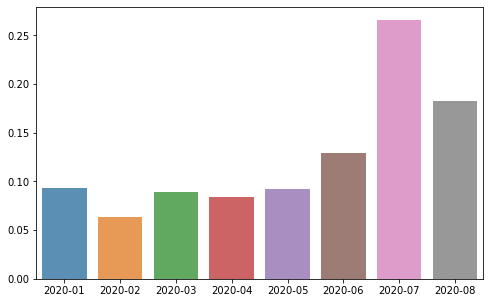

In [50]:
publication_month_count = df.publication_month.astype('category').value_counts(normalize=True)
plt.figure(figsize=(8, 5))
sns.barplot(publication_month_count.index, publication_month_count.values, alpha=0.8)
plt.show()

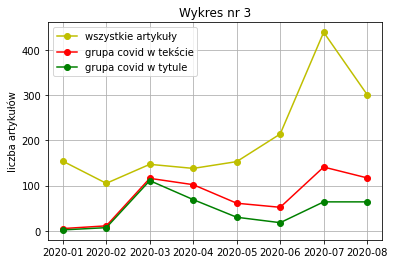

In [51]:
fig = plt.figure()
df_with_koronawirus_in_title = df.where(df["koronawirus_in_title"] > 0).dropna()

df_with_koronawirus_in_text = df.where(df["koronawirus_in_text"] > 0).dropna()

plt.plot(df[['koronawirus_in_text', 'publication_month']].groupby('publication_month').count(),
        color='y',
        marker='o')

plt.plot(df_with_koronawirus_in_text[['koronawirus_in_text', 'publication_month']].groupby('publication_month').count(),
        color='r',
        marker='o')

plt.plot(df_with_koronawirus_in_title[['koronawirus_in_title', 'publication_month']].groupby('publication_month').count(),
        color='g',
        marker='o')

plt.ylabel("liczba artykułów")
plt.grid()
plt.legend(["wszystkie artykuły", "grupa covid w tekście", "grupa covid w tytule"])
plt.title("Wykres nr 3")
fig.savefig('plots/line_graph_3.png')
plt.show()

In [52]:
df[['koronawirus_in_text', 'publication_month']].groupby('publication_month').count()

,koronawirus_in_text
publication_month,
2020-01,154
2020-02,105
2020-03,147
2020-04,138
2020-05,153
2020-06,214
2020-07,439
2020-08,301


### Total number of articles

In [53]:
df.shape[0]

1651

### Days with a record number of articles

In [54]:
df.publication_day.value_counts().head(6)

2020-06-29    28
2020-07-08    26
2020-07-01    25
2020-07-03    22
2020-08-25    22
2020-07-06    21
Name: publication_day, dtype: int64

### Covid article count per 100 articles

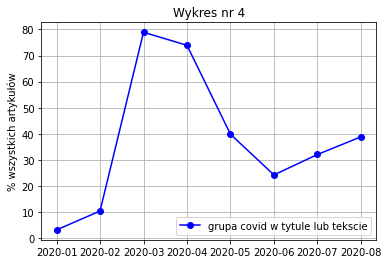

In [55]:
fig = plt.figure()
df_with_koronawirus_anywhere = df.where(df["koronawirus_anywhere"] > 0).dropna()

plt.plot((df_with_koronawirus_anywhere[['koronawirus_anywhere', 'publication_month']].groupby('publication_month').count() / df.groupby('publication_month').count()) * 100,
        color="b",
        marker='o')
plt.ylabel("% wszystkich artykułów")
plt.title("Wykres nr 4")
plt.grid()
plt.legend(["grupa covid w tytule lub tekscie"])
fig.savefig('plots/line_graph_4.png')


In [56]:
df_with_koronawirus_anywhere = df.where(df["koronawirus_anywhere"] > 0).dropna()
wskaznik = df_with_koronawirus_anywhere.groupby('publication_month').count() / df.groupby('publication_month').count() * 100
wskaznik["publication_date"]

publication_month
2020-01     3.246753
2020-02    10.476190
2020-03    78.911565
2020-04    73.913043
2020-05    39.869281
2020-06    24.299065
2020-07    32.118451
2020-08    38.870432
Name: publication_date, dtype: float64

### The total number of covid words

In [57]:
df.koronawirus_in_text.sum()

7025

### Mean covid word count per article

In [58]:
koronawirus_in_text_true = df['koronawirus_in_text'] > 0
df['koronawirus_anywhere'][koronawirus_in_text_true].mean()

12.177924217462932

### Articles with the highest number of words in the covid group

In [59]:
# df.loc[df.koronawirus_in_text.idxmax()]

# df['koronawirus_in_text_rank'] = df['koronawirus_in_text'].rank(ascending=False)
# df.sort_values(by='koronawirus_in_text', ascending=False).head(15)

# df.sort_values(by='koronawirus_in_text', ascending=False)[:5]

df.nlargest(n=5, columns='koronawirus_in_text')

,publication_date,publication_month,publication_day,author,title,url,koronawirus_in_text,koronawirus_in_title,question_mark,exclamation_mark,all_words,koronawirus_anywhere,koronawirus_anywhere_count
1456,2020-04-16 22:42:00,2020-04,2020-04-16,paweł tabędzki / marek targoński / sylwia sitka-czerniak / konrad marzec,Przełom w walce z koronawirusem?! ARCYWAŻNE zmiany ogłoszone przez rząd. Koronawirus w Polsce [ZAPIS RELACJI NA ŻYWO],https://www.se.pl/lublin/liczba-zgonow-i-zakazonych-rosnie-najnowsze-informacje-oraz-statystyki-koronawirus-w-polsce-relacja-na-zywo-aa-arVq-4nsQ-phQ6.html,525,1,99,123,11082,526,1
1476,2020-04-07 07:00:00,2020-04,2020-04-07,"magdalena jaśkiewicz-stawowczyk, marek targoński",Szokujący bilans koronawirusa w Polsce. Ważne słowa prezydenta Dudy. Groza w UK [ZAPIS RELACJI NA ŻYWO],https://www.se.pl/lublin/koronawirus-w-polsce-dzis-niedziela-palmowa-pierwsza-taka-w-historii-kosciola-relacja-na-zywo-aa-Hp4w-RQKA-CX2T.html,477,1,47,66,11050,478,1
1539,2020-03-04 22:25:00,2020-03,2020-03-04,marek targoński,Koronawirus w Polsce! Oto konsekwencje: wzrost cen i wysoki popyt [ZAPIS RELACJI NA ŻYWO],https://www.se.pl/lublin/koronawirus-w-polsce-tytul-relacja-na-zywo-aa-jzM9-R6pH-GAfM.html,338,1,75,74,7078,339,1
785,2020-03-19 09:22:00,2020-03,2020-03-19,marek targoński,Koronawirus Lubelskie: COVID-19 na Lubelszczyźnie. Kto i gdzie choruje? Kim są pacjenci?,https://www.se.pl/lublin/koronawirus-lubelskie-covid-19-na-lubelszczyznie-kto-i-gdzie-choruje-kim-sa-pacjenci-aa-F4Hk-fcQg-hXY5.html,51,1,11,9,635,52,1
1495,2020-03-27 10:14:00,2020-03,2020-03-27,NaN,Gdzie jest koronawisus w Polsce i Europie? Mapa zasięgu epidemii [MAPA KORONAWIRUSA],https://www.se.pl/lublin/koronawirus-w-polsce-gdzie-jest-wirus-z-chin-koronawirus-mapa-aa-dSBK-o5RJ-2eA4.html,31,1,13,10,431,32,1


### Total covid words each month

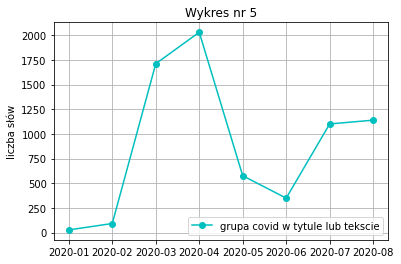

In [60]:
fig = plt.figure()
df_with_koronawirus_in_text = df[["koronawirus_in_text", 'publication_month']].where(df["koronawirus_in_text"] > 0).dropna()
plt.plot(
    df_with_koronawirus_in_text.groupby('publication_month').sum(),
    color="c",
    marker='o',
    label='grupa covid w tytule lub tekscie'
)
plt.grid()

plt.ylabel("liczba słów")
plt.title("Wykres nr 5")
plt.legend()
fig.savefig('plots/line_graph_5.png')

In [61]:
df_with_koronawirus_in_text.groupby('publication_month').sum()

,koronawirus_in_text
publication_month,
2020-01,27.0
2020-02,92.0
2020-03,1711.0
2020-04,2030.0
2020-05,576.0
2020-06,349.0
2020-07,1101.0
2020-08,1139.0


### Total covid words each month without top 3

In [62]:
df_with_koronawirus_in_text_without_top3 = df_with_koronawirus_in_text['koronawirus_in_text'] = df_with_koronawirus_in_text['koronawirus_in_text'].replace([df_with_koronawirus_in_text.nlargest(n=3, columns='koronawirus_in_text')],
     df_with_koronawirus_in_text['koronawirus_in_text'].mean().astype(int).round())

In [63]:
df_with_koronawirus_in_text_without_top3.max()

51.0

In [64]:
df_with_koronawirus_in_text.groupby('publication_month').sum()

,koronawirus_in_text
publication_month,
2020-01,27.0
2020-02,92.0
2020-03,1384.0
2020-04,1050.0
2020-05,576.0
2020-06,349.0
2020-07,1101.0
2020-08,1139.0


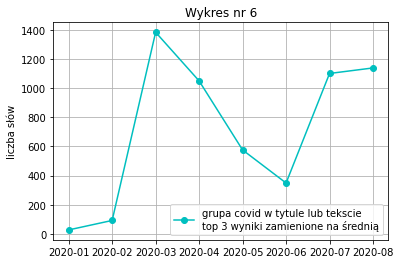

In [66]:
fig = plt.figure()
plt.plot(
    df_with_koronawirus_in_text.groupby('publication_month').sum(),
    color="c",
    marker='o',
    label='grupa covid w tytule lub tekscie \ntop 3 wyniki zamienione na średnią'
)
plt.grid()
plt.ylabel("liczba słów")
plt.title("Wykres nr 6")
plt.legend()
fig.savefig('plots/line_graph_6.png')

### Covid article without top 3 count per 1000 articles

In [67]:
df_with_koronawirus_in_text_sum = df_with_koronawirus_in_text.groupby('publication_month').sum()

In [68]:
all_words_sum = df[['all_words', 'publication_month']].groupby('publication_month').sum()

In [69]:
article_with_covid_count_1000_articles = df_with_koronawirus_in_text_sum["koronawirus_in_text"] / all_words_sum["all_words"] * 1000
article_with_covid_count_1000_articles

publication_month
2020-01     0.781454
2020-02     4.334920
2020-03    34.801851
2020-04    20.323236
2020-05    16.247320
2020-06     5.997697
2020-07    10.241384
2020-08    15.456852
dtype: float64

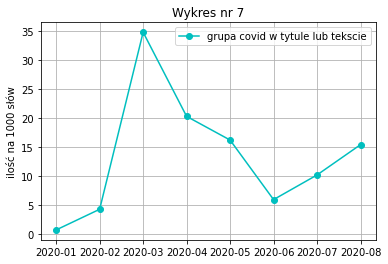

In [71]:
fig = plt.figure()
plt.plot(article_with_covid_count_1000_articles,
    color="c",
    marker='o',
    label='grupa covid w tytule lub tekscie'
)
plt.grid()
plt.ylabel("ilość na 1000 słów")
plt.title("Wykres nr 7")
plt.legend()
fig.savefig('plots/line_graph_7.png')

### The author of the largest number of articles with the word from the covid group in the title

In [72]:
df_with_koronawirus_in_title = df.where(df["koronawirus_in_title"] > 0).dropna()
df_with_koronawirus_in_title['author'].value_counts()[:1]

marek targoński    227
Name: author, dtype: int64

### The author of the largest number of articles with the word from the covid group in the text

In [73]:
df_with_koronawirus_in_text = df.where(df["koronawirus_in_text"] > 0).dropna()
df_with_koronawirus_in_text['author'].value_counts()[:1]


marek targoński    297
Name: author, dtype: int64

In [74]:
df.query('author == "marek targoński"').groupby('publication_month').sum()

,koronawirus_in_text,koronawirus_in_title,question_mark,exclamation_mark,all_words,koronawirus_anywhere,koronawirus_anywhere_count
publication_month,,,,,,,
2020-01,7,1,92,104,12664,8,1
2020-02,87,6,86,140,16301,93,10
2020-03,1324,73,239,242,28206,1397,76
2020-04,824,47,94,132,15392,871,63
2020-05,447,19,140,178,19466,466,39
2020-06,219,12,172,286,29120,231,23
2020-07,628,28,134,104,21354,656,39
2020-08,834,41,167,113,23317,875,46


In [75]:
#plt.plot(df.query('author == "marek targoński"').groupby('publication_month').sum())

### The author of the largest number of articles with the word from the covid group in the title

In [76]:
mt = df[['koronawirus_anywhere', 'publication_month']][df['author'].isin(['marek targoński'])]
mt['koronawirus_anywhere'].sum()

4597

### The author of the largest number of articles with the word from the covid - total covid words each month

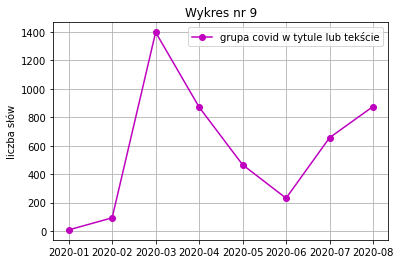

In [89]:
fig = plt.figure()
plt.plot(mt.groupby('publication_month').sum(),
        color="m",
        marker='o')
plt.ylabel("liczba słów")
plt.grid()
plt.title("Wykres nr 9")
plt.legend(["grupa covid w tytule lub tekście"])
fig.savefig('plots/line_graph_9.png')

### The author of the largest number of articles with the word from the covid - total covid articles

In [90]:
mt = df[['koronawirus_anywhere_count', 'publication_month']][df['author'].isin(['marek targoński'])]
mt['koronawirus_anywhere_count'].sum()

297

### The author of the largest number of articles with the word from the covid - total covid articles each month

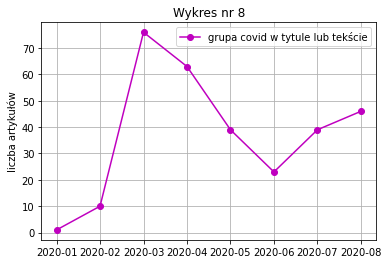

In [91]:
fig = plt.figure()
plt.plot(mt.groupby('publication_month').sum(),
        color="m",
        marker="o")
plt.grid()
plt.ylabel("liczba artykułów")
plt.title("Wykres nr 8")
plt.legend(["grupa covid w tytule lub tekście"])
fig.savefig('plots/line_graph_8.png')

### The total number of words in all articles

In [140]:
df[['all_words']].sum()

all_words    421992
dtype: int64

### The article with the most words

In [141]:
df[['publication_day', 'title', 'all_words']].nlargest(n=5, columns='all_words')

,publication_day,title,all_words
1458,2020-04-16,Przełom w walce z koronawirusem?! ARCYWAŻNE zmiany ogłoszone przez rząd. Koronawirus w Polsce [ZAPIS RELACJI NA ŻYWO],11082
1478,2020-04-07,Szokujący bilans koronawirusa w Polsce. Ważne słowa prezydenta Dudy. Groza w UK [ZAPIS RELACJI NA ŻYWO],11050
1541,2020-03-04,Koronawirus w Polsce! Oto konsekwencje: wzrost cen i wysoki popyt [ZAPIS RELACJI NA ŻYWO],7078
456,2020-06-29,Lubelskie: Księża zmienią parafie! Decyzje personalne i nominacje w archidiecezji [LISTA],2699
492,2020-06-23,BURZE nad Polską. OGROMNE straty i zniszczenia. Gdzie jest burza? [RELACJA NA ŻYWO],1804


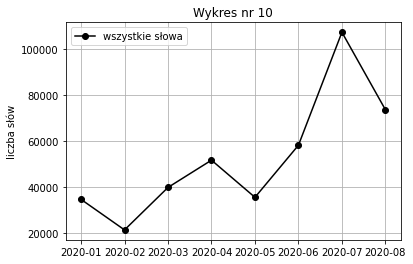

In [79]:
fig = plt.figure()
plt.plot(df[['all_words', 'publication_month']].groupby('publication_month').sum(),
        color="k",
        marker="o")
plt.grid()
plt.ylabel("liczba słów")
plt.title("Wykres nr 10")
plt.legend(["wszystkie słowa"])
fig.savefig('plots/line_graph_10.png')

In [80]:
a = df[['all_words', 'publication_month']].groupby('publication_month').sum()
a

,all_words
publication_month,
2020-01,34551
2020-02,21223
2020-03,39768
2020-04,51665
2020-05,35452
2020-06,58189
2020-07,107505
2020-08,73689


In [81]:
b = df_with_koronawirus_in_text[['koronawirus_in_text', 'publication_month']].groupby('publication_month').sum()
b

,koronawirus_in_text
publication_month,
2020-01,27.0
2020-02,92.0
2020-03,1680.0
2020-04,2030.0
2020-05,576.0
2020-06,339.0
2020-07,1101.0
2020-08,1139.0


In [82]:
(b['koronawirus_in_text']/a['all_words']) * 100

publication_month
2020-01    0.078145
2020-02    0.433492
2020-03    4.224502
2020-04    3.929159
2020-05    1.624732
2020-06    0.582584
2020-07    1.024138
2020-08    1.545685
dtype: float64

### Question mark and exclamation mark

In [83]:
df[['question_mark']].sum()

question_mark    2089
dtype: int64

In [84]:
df[['question_mark', 'publication_month']].groupby('publication_month').max()

,question_mark
publication_month,
2020-01,10
2020-02,6
2020-03,75
2020-04,99
2020-05,7
2020-06,14
2020-07,12
2020-08,11


In [85]:
df[['exclamation_mark']].sum()

exclamation_mark    2312
dtype: int64

In [86]:
df[['exclamation_mark', 'publication_month']].groupby('publication_month').sum()

,exclamation_mark
publication_month,
2020-01,164
2020-02,169
2020-03,282
2020-04,399
2020-05,258
2020-06,394
2020-07,374
2020-08,272


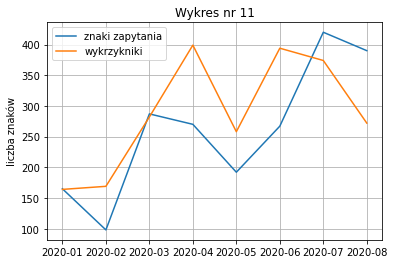

In [88]:
fig = plt.figure()
plt.plot(df[['question_mark', 'publication_month']].groupby('publication_month').sum())

plt.plot(df[['exclamation_mark', 'publication_month']].groupby('publication_month').sum())
plt.grid()
plt.legend(["znaki zapytania", "wykrzykniki"])
plt.title("Wykres nr 11")
plt.ylabel("liczba znaków")
fig.savefig('plots/line_graph_11.png')

In [56]:
df[['publication_day', 'title', 'question_mark']].nlargest(n=5, columns='question_mark')

,publication_day,title,question_mark
1608,2020-04-16,Przełom w walce z koronawirusem?! ARCYWAŻNE zmiany ogłoszone przez rząd. Koronawirus w Polsce [ZAPIS RELACJI NA ŻYWO],99
748,2020-03-04,Koronawirus w Polsce! Oto konsekwencje: wzrost cen i wysoki popyt [ZAPIS RELACJI NA ŻYWO],75
1610,2020-04-07,Szokujący bilans koronawirusa w Polsce. Ważne słowa prezydenta Dudy. Groza w UK [ZAPIS RELACJI NA ŻYWO],47
418,2020-06-24,"Co robić z dzieckiem na wakacjach, kiedy pada? [POMYSŁY, WAKACJE 2020]",14
680,2020-03-27,Gdzie jest koronawisus w Polsce i Europie? Mapa zasięgu epidemii [MAPA KORONAWIRUSA],13


In [57]:
df[['publication_day', 'title', 'exclamation_mark']].nlargest(n=5, columns='exclamation_mark')

,publication_day,title,exclamation_mark
1608,2020-04-16,Przełom w walce z koronawirusem?! ARCYWAŻNE zmiany ogłoszone przez rząd. Koronawirus w Polsce [ZAPIS RELACJI NA ŻYWO],123
748,2020-03-04,Koronawirus w Polsce! Oto konsekwencje: wzrost cen i wysoki popyt [ZAPIS RELACJI NA ŻYWO],74
1610,2020-04-07,Szokujący bilans koronawirusa w Polsce. Ważne słowa prezydenta Dudy. Groza w UK [ZAPIS RELACJI NA ŻYWO],66
418,2020-06-24,"Co robić z dzieckiem na wakacjach, kiedy pada? [POMYSŁY, WAKACJE 2020]",14
422,2020-06-23,BURZE nad Polską. OGROMNE straty i zniszczenia. Gdzie jest burza? [RELACJA NA ŻYWO],10


In [58]:
df[koronawirus_in_text_true].max()

publication_date                                                                         2020-08-31 11:31:00
publication_month                                                                                    2020-08
publication_day                                                                                   2020-08-31
title                            „Pol’and’Rock” Music w drogeriach Sephora! WOŚP wypuściło wyjątkowe perfumy
url                           https://www.se.pl/lublin/zwierzeta-z-zoo-prosza-o-pomoc-aa-tECy-38rb-PCaM.html
koronawirus_in_text                                                                                      525
koronawirus_in_title                                                                                       1
question_mark                                                                                             99
exclamation_mark                                                                                         123
all_words          